# Olympics Dataset - Case Study

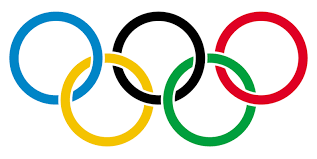

# INTRODUCTION

Olympics games are the leading international sporting events which are normally held every four years, alternating between the Summer and Winter Olympics every two years in the four=year period. Summer, Winter, YOG & Paralympics.

In this project, we are going to see the Olympics dataset analysis using Python. The modern Olympic Games or Olympics are leading international sports events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are considered the world’s foremost sports competition with more than 100 nations participating.
    
This dataset contains historic information about the olympics games happened from year 2000 to 2012. The total number of unique sports in the Olympics are 49 during these years and for each sports there are multiple winners based on bronze, silver and gold medals for that year. Therefore various data is generated. So, by using Python we will analyze this data.
    
Also as different countries participating we will analyse the relative performance of the various countries. in diiferent sports in different years and overall(cumulative). In this Project we will also take key insights from the different visualizations using Matplotlib and seaborn libraries.
    
**Overall analysis** like how many sports are played, how many countries are participated etc is done.
Then did **country wise analysis** like graph many medals won through the years.
And also, **athletes wise analysis** is done to analyse performance of top athletes

# <font color = 'Blue'><b>Variables Description</b>

* **name**          : Name of the Athlete
* **Age**           : age of the Athlete
* **country**       : Country which the athlete represents
* **year**          : Year in which the Event took place
* **Date_Given**    : Date at which the medal is won by the athlete
* **sports**        : Name of sport in which athlete participated
* **gold_medal**    : Number of Gold medals won by the athlete in that sport that year
* **silver_medal**  : Number of Silver medals won by the athlete in that sport that year
* **bronze_medal**  : Number of Bronze medals won by the athlete in that sport that year
* **total_medal**   : Number of total medals won by the athlete that year

## Importing Necessary Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import missingno as msno
plt.style.use("seaborn")
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## Loading and Getting a Glimpse of the Dataset

The dataset available to us in .csv format, so we will load data set into pandas data frame for starting our analysis

In [3]:
# importing the dataset using pandas and creating a dataframe
df = pd.read_csv("olympix_master.csv")

In [4]:
# getting the number of features and observations in the dataset
df.shape
print(f"The dataset has {df.shape[0]} observations and {df.shape[1]} variables")

The dataset has 8618 observations and 10 variables


In [5]:
#Getting a glimpse of top 5 rows of a dataset
df.head()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6


In [6]:
#Getting a glimpse of bottom  5 rows of a dataset
df.tail()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1
8617,Rod White,23.0,United States,2000,10-01-2000,Archery,0,0,1,1


## Basic Exploration of the Data(Basic EDA)

In [7]:
# To check if the headers is well written
df.columns

Index(['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'brone_medal', 'total_medal'],
      dtype='object')

### Number of each datatype columns

In [8]:
#Checking for the number of each data type----
df_numeric = df.select_dtypes(include='number') # extract columns with number
num = len(df_numeric.columns) # sum the columns extracted
print(f'We have {num} numeric columns') #format string

df_obj = df.select_dtypes(include='object') # extract columns with object
num_2 = len(df_obj.columns) 
print(f'we have {num_2} categorical columns')


print(f'With a total number of {num + num_2} columns')

We have 6 numeric columns
we have 4 categorical columns
With a total number of 10 columns


## Lets check the data type of each variable as read by the python

In [9]:
# using info() function to get data type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


As we can see that all the variables are read correctly by the python except Date_Given which is read as object instead of Datetime. But we will not convert it into Datetime as it is not required for our analysis purpose.

Also we can see that there are total 8618 non null observations all columns expect name and age where we have 8613 non-null observations.

This means we have 5 null values in name and age columns which will be dealt later.

### Let's now check the number of unique values in each columns to understand the dataset better

In [10]:
# we are using nunique() function to check the number of unique values
# Also we are applying 'for' loop for printing number of unique values of each column neatly
for vars in df.columns:
    print(f'no.of unique values in {vars} : {df[vars].nunique()}\n')

no.of unique values in name : 6955

no.of unique values in age : 42

no.of unique values in country : 110

no.of unique values in year : 7

no.of unique values in Date_Given : 7

no.of unique values in sports : 49

no.of unique values in gold_medal : 7

no.of unique values in silver_medal : 4

no.of unique values in brone_medal : 4

no.of unique values in total_medal : 7



# keyinsights:
* There are total 6955 different athletes that participated in various olympics during year(2000 - 2012).
* Number of countries participated in the olympics over these years are 110.
* During the span of year 2000-2012, There are 7 years during which olympic games take place.
* The total number of unique sports in the olympic games are 49.

## Checking to see the unique years

In [11]:
print(sorted(df.year.unique()),'\n')
print('The total number of years :',len(df.year.unique()))

[2000, 2002, 2004, 2006, 2008, 2010, 2012] 

The total number of years : 7


## countries which participated in the olympics from year 2000 to 2012

In [12]:
# checking to see the unique country
print(df.country.unique(),'\n')
print(f'Total number of countries that participated in the Olympic games from 2000 to 2012 : {len(df.country.unique())}')

['United States' 'Russia' 'Australia' 'Canada' 'Norway' 'China' 'Zimbabwe'
 'Netherlands' 'South Korea' 'Croatia' 'France' 'Japan' 'Hungary'
 'Germany' 'Poland' 'South Africa' 'Sweden' 'Ukraine' 'Italy'
 'Czech Republic' 'Austria' 'Finland' 'Romania' 'Great Britain' 'Jamaica'
 'Singapore' 'Belarus' 'Chile' 'Spain' 'Tunisia' 'Brazil' 'Slovakia'
 'Costa Rica' 'Bulgaria' 'Switzerland' 'New Zealand' 'Estonia' 'Kenya'
 'Ethiopia' 'Trinidad and Tobago' 'Turkey' 'Morocco' 'Bahamas' 'Slovenia'
 'Armenia' 'Azerbaijan' 'India' 'Puerto Rico' 'Egypt' 'Kazakhstan' 'Iran'
 'Georgia' 'Lithuania' 'Cuba' 'Colombia' 'Mongolia' 'Uzbekistan'
 'North Korea' 'Tajikistan' 'Kyrgyzstan' 'Greece' 'Macedonia' 'Moldova'
 'Chinese Taipei' 'Indonesia' 'Thailand' 'Vietnam' 'Latvia' 'Venezuela'
 'Mexico' 'Nigeria' 'Qatar' 'Serbia' 'Serbia and Montenegro' 'Hong Kong'
 'Denmark' 'Portugal' 'Argentina' 'Afghanistan' 'Gabon'
 'Dominican Republic' 'Belgium' 'Kuwait' 'United Arab Emirates' 'Cyprus'
 'Israel' 'Algeria' 'Mon

## Let's see the different sports played in olympics over these years

In [13]:
# checking to see the unique sport
print(df.sports.unique(),'\n')
print(f'The total number of sports : {len(df.sports.unique())}')

['Swimming' 'Gymnastics' 'Speed Skating' 'Cross Country Skiing'
 'Short-Track Speed Skating' 'Diving' 'Cycling' 'Biathlon' 'Alpine Skiing'
 'Ski Jumping' 'Nordic Combined' 'Athletics' 'Table Tennis' 'Tennis'
 'Synchronized Swimming' 'Shooting' 'Rowing' 'Fencing' 'Equestrian'
 'Canoeing' 'Bobsleigh' 'Badminton' 'Archery' 'Wrestling' 'Weightlifting'
 'Waterpolo' 'Volleyball' 'Triathlon' 'Trampoline' 'Taekwondo' 'Softball'
 'Snowboarding' 'Skeleton' 'Sailing' 'Rhythmic Gymnastics'
 'Modern Pentathlon' 'Luge' 'Judo' 'Ice Hockey' 'Hockey' 'Handball'
 'Football' 'Figure Skating' 'Freestyle Skiing' 'Curling' 'Baseball'
 'Boxing' 'Beach Volleyball' 'Basketball'] 

The total number of sports : 49


## Total number of unique athlete participated over the years

In [14]:
# checking to see the unique number of athelete
print(f"The total number of Athletes: {df.name.nunique()}")

The total number of Athletes: 6955


## Dealing with Missing Values

In [15]:
# Check whether there are any missing values
print(df.isna().values.any())
print(f'This means we have missing values in our data set.')

True
This means we have missing values in our data set.


In [16]:
# checking the count of missing values
count_null = df.isna().sum().sum()
print(f"We have {count_null} missing values in our data set")

We have 10 missing values in our data set


In [17]:
# Checking the columns containing the null values
print(df.isnull().sum(),'\n')
print("We have 5 null values in both name and age columns")

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64 

We have 5 null values in both name and age columns


## Lets check the percentage of missing values in the data set

In [18]:
# Checking for the percentage of the missing data

# creating a data frame for percentage of missing data
#Checking for the percentage of the missing data

#creating a dataframe for percebtage of missing data
percentage_of_missing_data = pd.DataFrame({'Percentage of Missing of Data':round((df.isnull().sum()/len(df.index)) * 100,2)}) 
percentage_of_missing_data = percentage_of_missing_data.sort_values(by='Percentage of Missing of Data',ascending=False)
percentage_of_missing_data

,Percentage of Missing of Data
name,0.06
age,0.06
country,0.00
year,0.00
Date_Given,0.00
sports,0.00
gold_medal,0.00
silver_medal,0.00
brone_medal,0.00
total_medal,0.00


**As we have very small percentage of missing values (0.06%), we will drop rows with missing data**.

### Printing the rows which contains missing data

In [19]:
df.loc[df.isnull().any(axis=1)]

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1428,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
1429,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
1430,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
4485,NaN,NaN,Argentina,2012,08-12-2012,Hockey,0,1,0,1
4486,NaN,NaN,Argentina,2012,08-12-2012,Hockey,0,1,0,1


### Dropping the rows which contains missing data

In [20]:
df.dropna(inplace=True)

### Let's check for any missing data after dropping the null values

In [21]:
#To check if there is still missing data
df.isnull().sum().any()

False

Now, we don't have any missing values.

## Checking for duplicates in the data set

In [22]:
print(f"we have {df.duplicated().sum()} duplicate values in our dataframe")

we have 0 duplicate values in our dataframe


we understand that presence of duplicates in the dataset introduces bias in the study and we have to drop the duplicates but we have no duplicates in the data set after dropping missing values.

## Removing the special characters from the name column.

In [23]:
# To remove special charcaters from the name column we will import regex library
import re

In [24]:
# replacing all the charcaters other than A-Z, a-z and white space with empty string
df['name'] = df.name.replace('[^A-Za-z ]', '',regex=True)

In [25]:
# printing top 50 rows to check if there is still any special charcater in name column
df['name'].head(50)

0                   Michael Phelps
1                   Michael Phelps
2                   Michael Phelps
3                 Natalie Coughlin
4                    Aleksey Nemov
5                    Alicia Coutts
6                   Missy Franklin
7                      Ryan Lochte
8                  Allison Schmitt
9                 Natalie Coughlin
10                      Ian Thorpe
11                     Dara Torres
12                   Cindy Klassen
13                   Nastia Liukin
14                    Marit Bjrgen
15                        Sun Yang
16                 Kirsty Coventry
17            Libby LentonTrickett
18                     Ryan Lochte
19                  Inge de Bruijn
20                   Petria Thomas
21                      Ian Thorpe
22                  Inge de Bruijn
23                    Gary Hall Jr
24                    Michael Klim
25                    Susie ONeill
26                  Jenny Thompson
27       Pieter van den Hoogenband
28                  

**Here we can see that all special characters are removed from name field and our dataframe is cleaned.**

In [26]:
# Exporting the cleaned dataframe into csv file for furthur analysis in pySpark
df.to_csv("oylmpic_cleaned_data.csv",index=False)

## performing data visualization techniques to appropriate columns and explaining them.

## TOP 10 COUNTRIES PARTICIPATION : 

In [27]:
# Top 10 countries participating in olympics
Top_Countries = df.value_counts(['country']).reset_index(name = 'counts')[:10]
Top_Countries

,country,counts
0,United States,1109
1,Russia,706
2,Germany,552
3,Australia,524
4,China,450
5,Canada,351
6,Italy,307
7,Great Britain,296
8,France,287
9,Netherlands,286


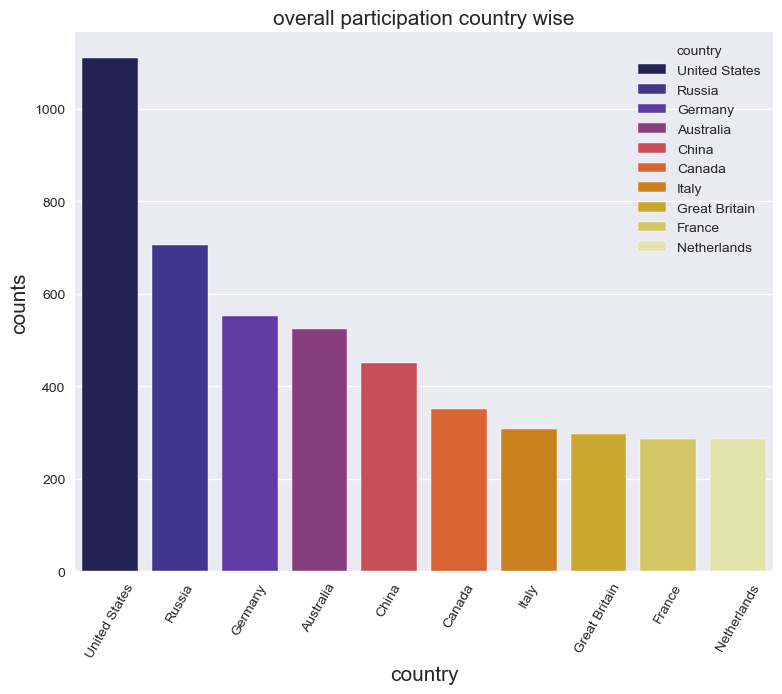

In [28]:
sns.set_style("darkgrid")
matplotlib.rcParams['figure.figsize'] = (9,7)

plt.title("overall participation country wise", fontsize = 15)
barplot = sns.barplot(data = Top_Countries, x= "country", y = "counts", hue = "country", palette = "CMRmap", dodge = False)
barplot.set_xticklabels(rotation = 60, labels = Top_Countries.country)
plt.xlabel("country", fontsize = 15)
plt.ylabel("counts", fontsize = 15)
plt.show()

As historically USA has won many medals it would make sense the participation is highest from USA.

### Top 10 countries produced the most athletes

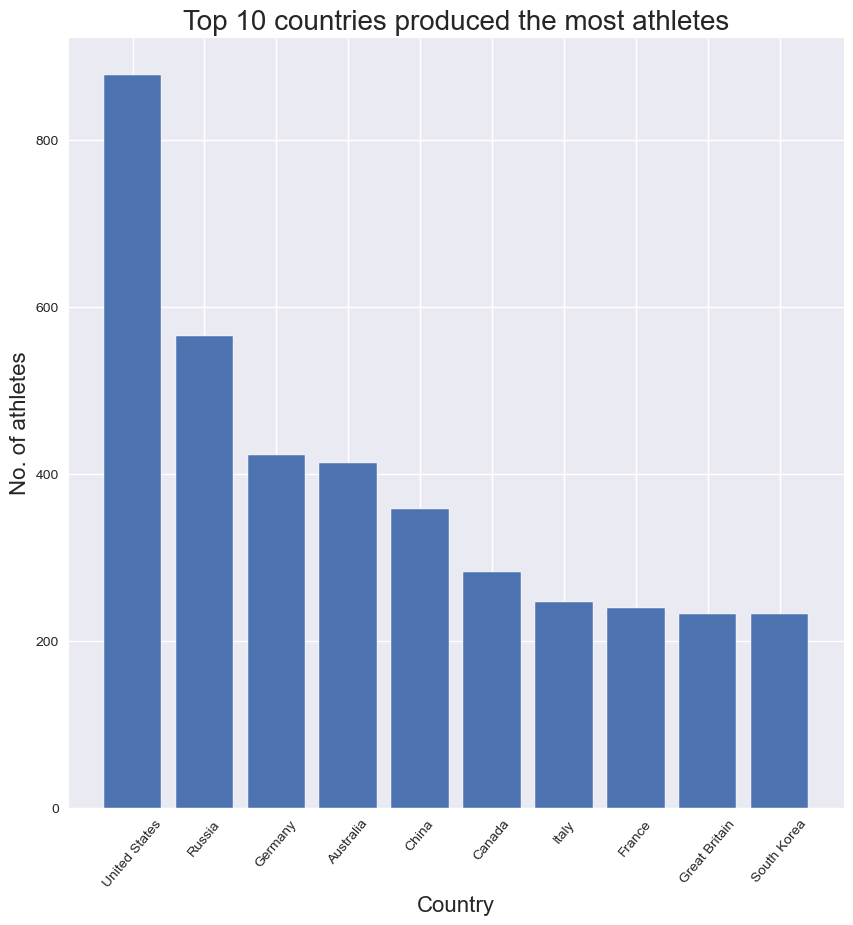

In [30]:
# count how many athletes each country have produced.
# make sure that count athletes who participated multiple times once.
athletes_each_country = df.drop_duplicates(['name']).groupby('country')['name'].count().reset_index().sort_values("name", ascending=False).head(10)

# show the bar graph
matplotlib.rcParams['figure.figsize'] = (10, 10)
plt.bar(athletes_each_country.country, athletes_each_country.name)
plt.xlabel('Country',fontsize=16)
plt.ylabel('No. of athletes',fontsize=16)
plt.xticks(rotation=50)
plt.title('Top 10 countries produced the most athletes',fontsize=20);

- As USA has historically won maximum no of medals it would make sense that maximum number of athletes are produced by USA followed by Russia.

### Sports having most number of Medals so far (Top 10)

In [31]:
top_10_sports_medals_df = df.groupby('sports')[['gold_medal', 'silver_medal', 'brone_medal','total_medal']].sum().sort_values('total_medal', ascending=False).head(10)
top_10_sports_medals_df

,gold_medal,silver_medal,brone_medal,total_medal
sports,,,,
Swimming,270,257,238,765
Athletics,253,257,243,753
Rowing,192,192,192,576
Football,136,134,137,407
Hockey,129,128,129,386
Ice Hockey,129,129,126,384
Handball,118,116,117,351
Canoeing,111,111,111,333
Waterpolo,102,101,103,306


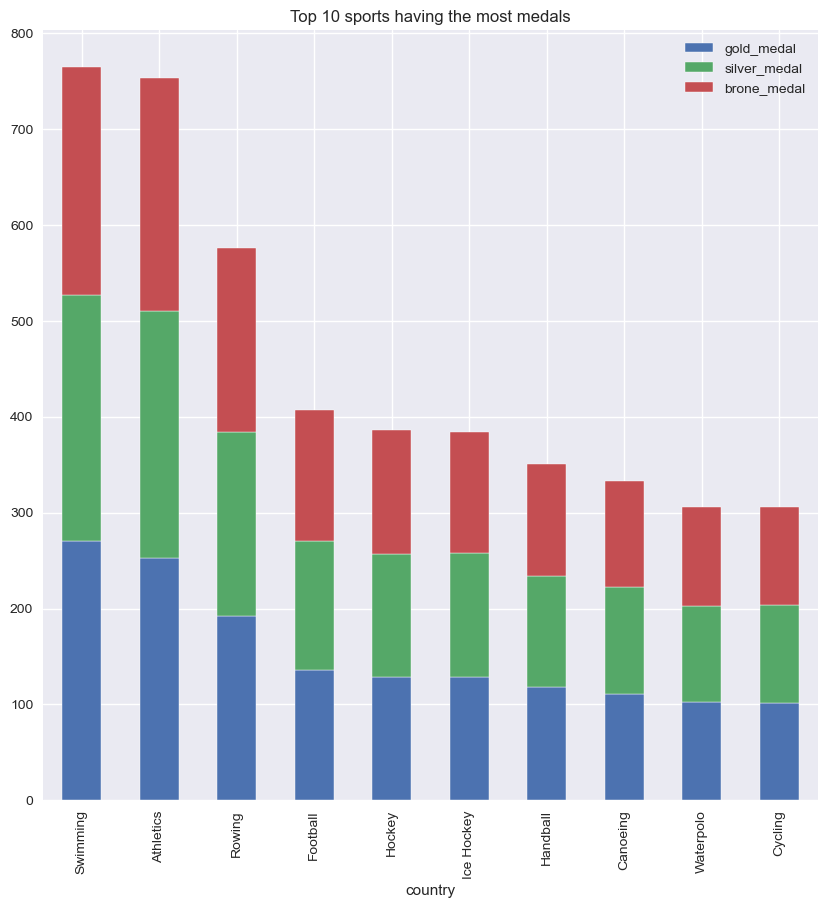

In [32]:
top_10_sports_medals_df[['gold_medal', 'silver_medal', 'brone_medal']].plot(kind='bar'
                                                                               ,stacked=True, 
                                                                               title='Top 10 sports having the most medals', xlabel='country');

- We can see from the above plot that most medals are won in **swimming** followed by Athletics and Rowing.

### Top 20 players who won most number of medals with there countries.

In [33]:
# create the dictionary about country and color for later visualization.
colors = {'United States':'red', 'Norway':'blue', 'Australia':'yellow', 'Netherlands':'green', 'Hungary':'orange',
          'Italy':'black', 'Great Britain':'purple','Austria':'cyan','Jamaica':'magenta'}

#Creating dataframe for top medalists
top_medalists = df.groupby('name')['total_medal'].sum().reset_index().sort_values('total_medal', ascending=False).head(20)

# add nationality and sport to above dataframe.
add_df = df.drop_duplicates('name')[['name', 'country', 'sports']]
top_medalists_df = top_medalists.merge(add_df, on='name', how='left')
top_medalists_df


,name,total_medal,country,sports
0,Michael Phelps,22,United States,Swimming
1,Natalie Coughlin,12,United States,Swimming
2,Ryan Lochte,11,United States,Swimming
3,Ole Einar Bjrndalen,9,Norway,Biathlon
4,Leisel Jones,9,Australia,Swimming
5,Ian Thorpe,9,Australia,Swimming
6,Inge de Bruijn,8,Netherlands,Swimming
7,Katalin Kovcs,8,Hungary,Canoeing
8,Apolo Anton Ohno,8,United States,Short-Track Speed Skating
9,Jason Lezak,8,United States,Swimming


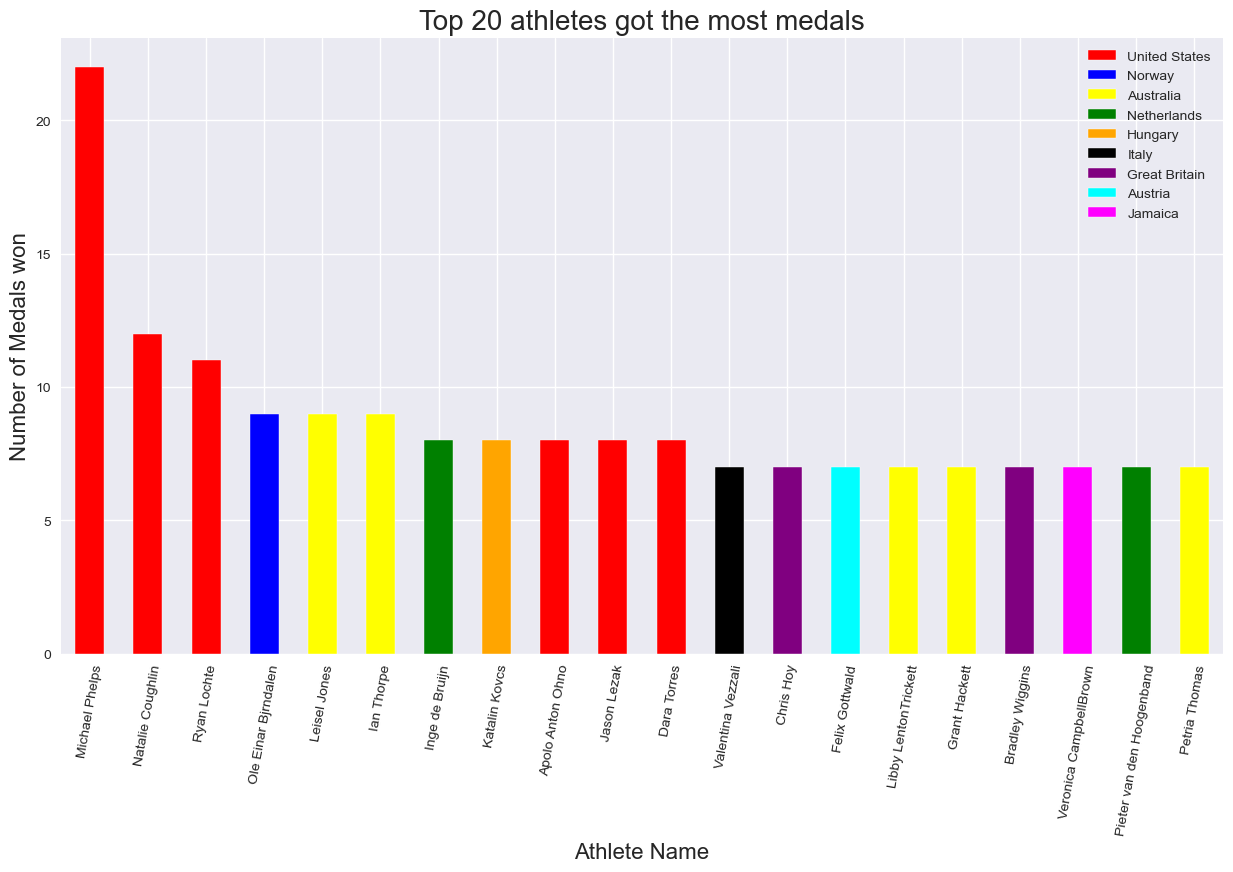

In [34]:
# import Patch to add legend lator.
from matplotlib.patches import Patch

# create bar charts.
plt.figure(figsize=(15,8))
top_medalists_df.set_index('name').total_medal.plot(kind='bar', color=top_medalists_df['country'].replace(colors)).legend(
    [
        Patch(facecolor=colors['United States']),
        Patch(facecolor=colors['Norway']),
        Patch(facecolor=colors['Australia']),
        Patch(facecolor=colors['Netherlands']),
        Patch(facecolor=colors['Hungary']),
        Patch(facecolor=colors['Italy']),
        Patch(facecolor=colors['Great Britain']),
        Patch(facecolor=colors['Austria']),
        Patch(facecolor=colors['Jamaica']),
    ], ['United States', 'Norway', 'Australia', 'Netherlands', 'Hungary', 'Italy', 'Great Britain','Austria','Jamaica']
)
plt.xticks(rotation=80)
plt.xlabel('Athlete Name',fontsize=16)
plt.ylabel('Number of Medals won',fontsize=16)
plt.title('Top 20 athletes got the most medals',fontsize=20);

- We can see from the above plot that **micheal phelps** belongs to **USA** has won more that 20 medals overs the years.

### Which Sports is most popular in terms on number of players (Top 5)

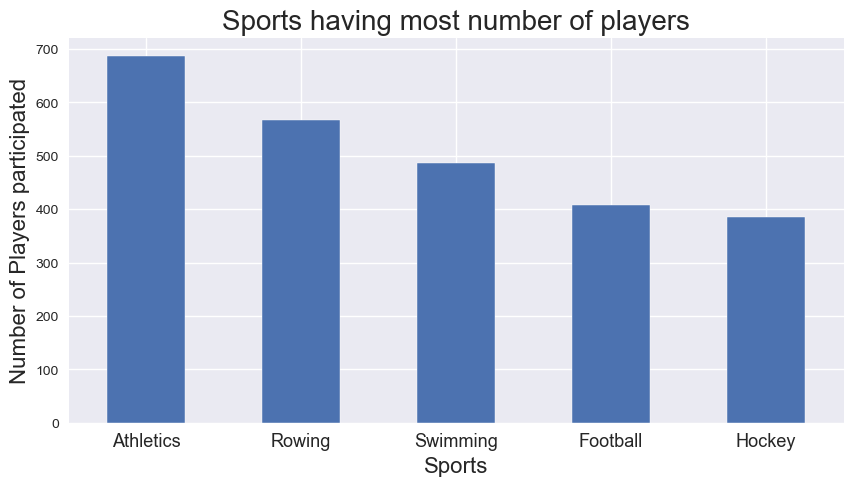

In [35]:
popular_event = df.groupby("sports").count()['name'].sort_values(ascending = False).head()
popular_event.plot.bar(figsize=(10, 5))
plt.xticks(rotation=0,fontsize=13)
plt.xlabel('Sports',fontsize=16)
plt.ylabel('Number of Players participated',fontsize=16)
plt.title('Sports having most number of players',fontsize=20);

- We can take an insight from the above plot that the sport having the most participation is **Athletics** followed by Rowing and Swimming.

### Number of Players & Countries participated each year

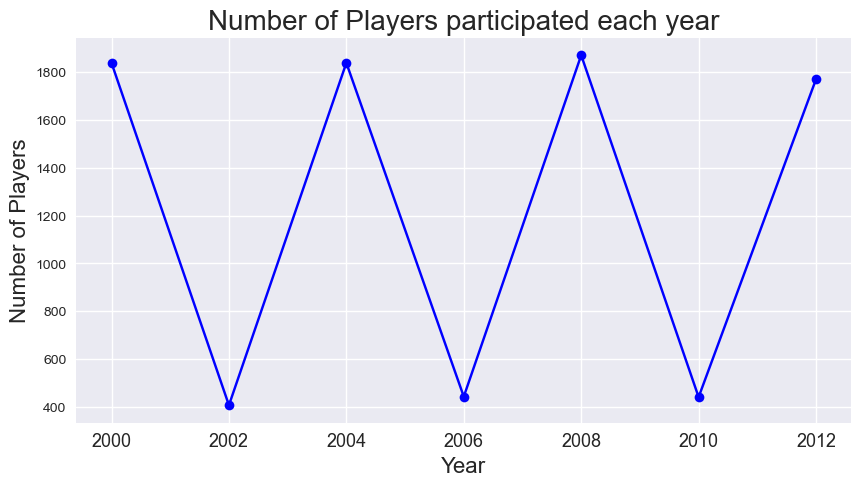

In [36]:
# create a new dataframe containing the number of all athletes by each year.
athletes_by_year = df.drop_duplicates(['year','name'])['year'].value_counts().reset_index().sort_values('index')
athletes_by_year = athletes_by_year.rename(columns={'index':'Year', 'year':'total_athletes'})

# plot line chart.
plt.figure(figsize=(10,5))
plt.plot(athletes_by_year.Year, athletes_by_year.total_athletes, 'b-o')
plt.xticks(rotation=0,fontsize=13)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of Players',fontsize=16)
plt.title('Number of Players participated each year',fontsize=20);

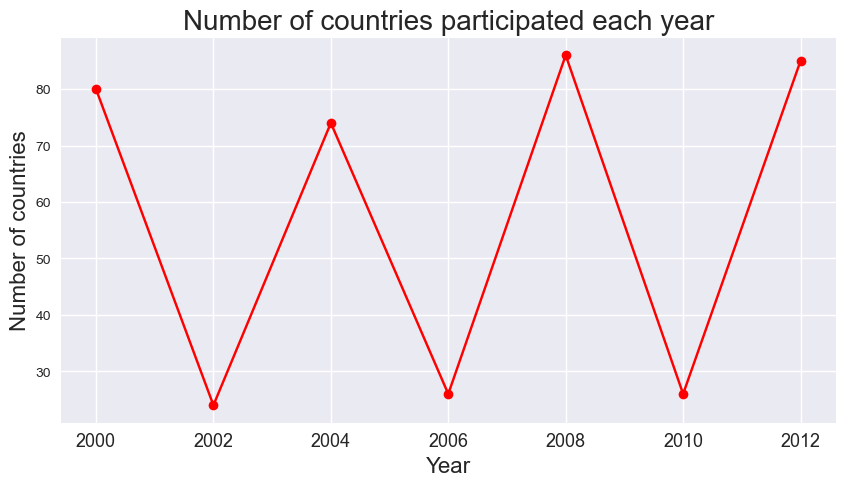

In [37]:
# create a new dataframe containing the number of countries by year.
countries_by_year = df.drop_duplicates(['year','country'])['year'].value_counts().reset_index().sort_values('index')
countries_by_year = countries_by_year.rename(columns={'index':'Year', 'year':'total_countries'})

# plot line chart
plt.figure(figsize=(10,5))
plt.plot(countries_by_year.Year, countries_by_year.total_countries, 'r-o')
plt.xticks(rotation=0,fontsize=13)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of countries',fontsize=16)
plt.title('Number of countries participated each year',fontsize=20);

- We can see from the above Two plots that number of players & number of countries participated varies hugely in consecutive events. This is due to the fact that there are two types of events Summer Olympics (2000,2004,2008,2012) & Winter Olympics (2002,2006,2010)which occurs every 4 years.

- Number of Participation and Sports played varies in these two events.


### Variation in Age through the olympics history

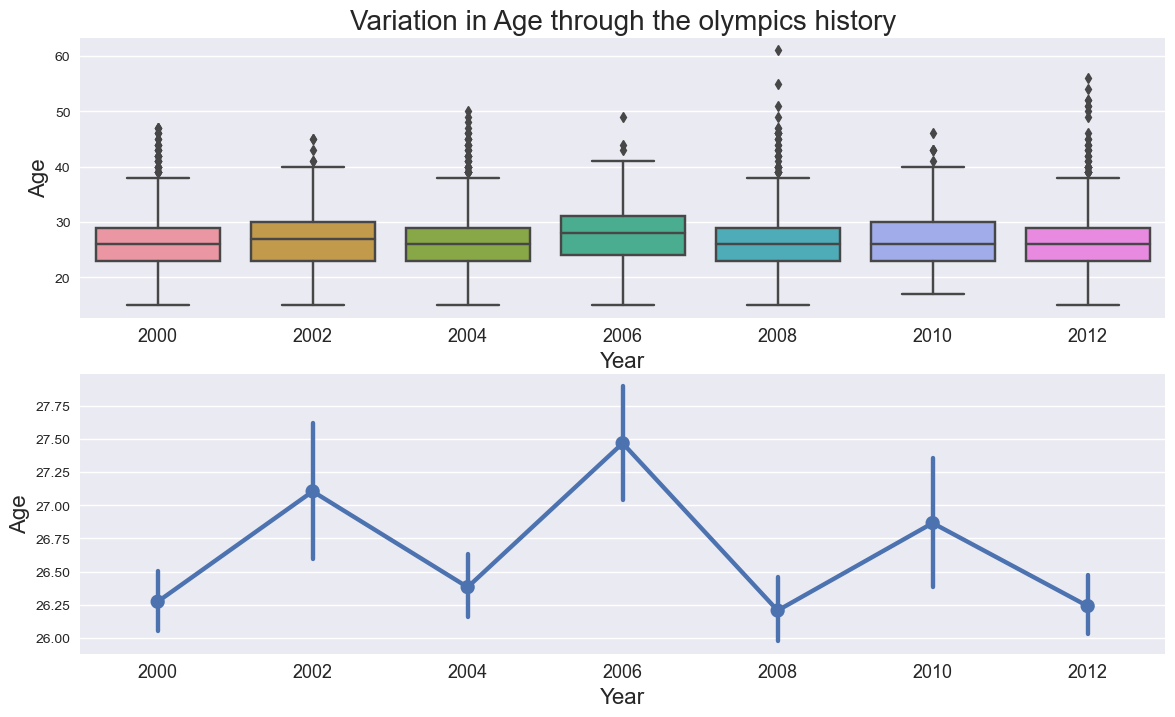

In [38]:
plt.figure(figsize=(14,8))
plt.subplot(211)
ax = sns.boxplot(x='year', y='age', data=df)
ax.set_title('Variation in Age through the olympics history.')
plt.xticks(rotation=0,fontsize=13)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Age',fontsize=16)
plt.title('Variation in Age through the olympics history',fontsize=20)
plt.subplot(212)
ax = sns.pointplot(x='year', y='age', data=df)
plt.xticks(rotation=0,fontsize=13)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Age',fontsize=16);

- From the above plot it can be seen that median age of participants over the Olympics history lies between 26 years to 28 years. 

### Check if the age dataset is skewed or symmetric. Based on results perform transformation.¶

In [39]:
# Checking Skewness value of Age Dataset
print(f"Value of Skewness in age dataset is: {df['age'].skew()}")

Value of Skewness in age dataset is: 0.8590070668484233


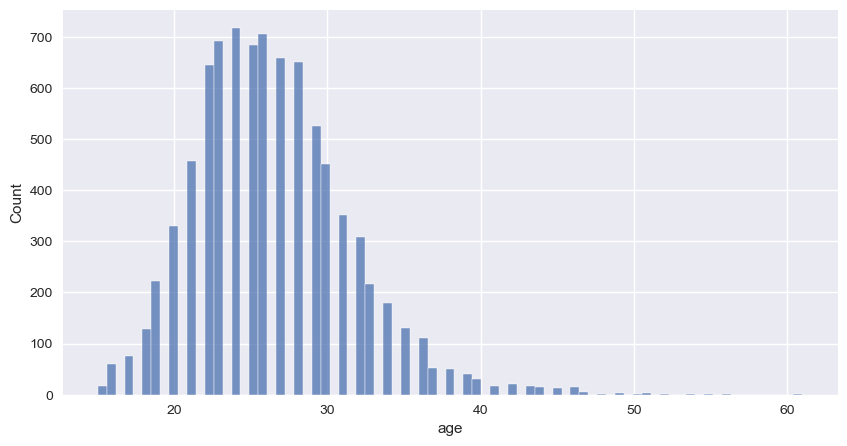

In [40]:
# Plotting Histogram to see the distribution of age dataset
plt.figure(figsize=(10,5))
sns.histplot(df['age']);

- Since the value of **skewness** is more than 0.5 we can say that our age dataset is **Right Skewed** Also from the histogram its is clear that the age dataset is Right Skewed because distribution is not uniform and have right tail. we have some heavy outliers after age 50.


<AxesSubplot:xlabel='age'>

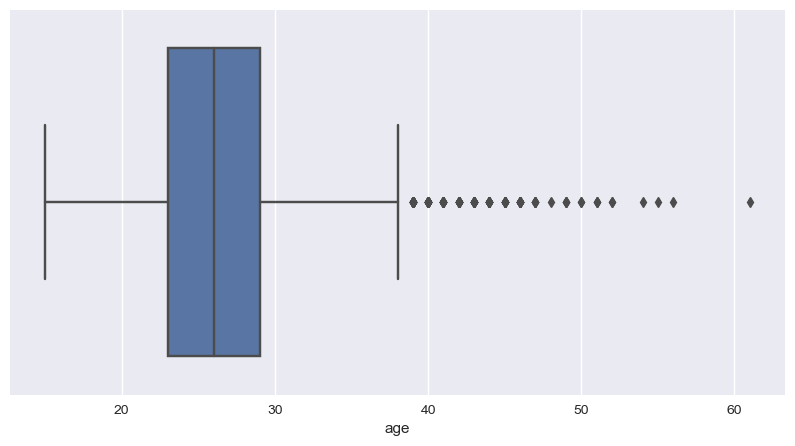

In [41]:
# Checking outliers using box-plot
plt.figure(figsize=(10,5))
sns.boxplot(df['age'])

- From the above box plot it is clear that the age dataset contains outliers and needs to be handled.


### Logarithmic Transfromation on age dataset as it doesnot contains any negetive values

In [42]:
# Using Logarithmic Transfromation to try to make age dataset symmetrical.
df['logarithm_age'] = np.log(df['age']+1)

### Let's again check distribution of age dataset, Skewness value and outliers after Transformation

<AxesSubplot:xlabel='logarithm_age', ylabel='Count'>

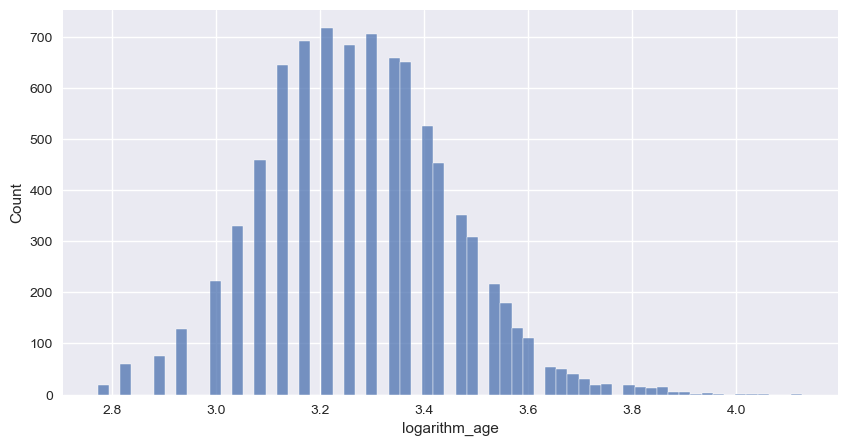

In [43]:
# Plotting Histogram to see the distribution of age dataset after log transformation
plt.figure(figsize=(10,5))
sns.histplot(df['logarithm_age'])

- Histogram seems to have normal distribution of age dataset after transformation.
  Let's check skewness value.

In [44]:
# Checking Skewness value of age dataset after transformation
df['logarithm_age'].skew()

0.17836058508900202

- As the skewness value is 0.178 whiich is well below 0.5 we can say that our age dataset after log transformation is now symmetrical.


### Perform appropriate numerical measures on each column and report them accordingly

###  Numerical columns

In [45]:
# Statistical summary of Numerical columns
df.describe()

,age,year,gold_medal,silver_medal,brone_medal,total_medal,logarithm_age
count,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000
mean,26.405434,2005.975386,0.364914,0.362940,0.377917,1.105770,3.294160
std,5.102118,4.288737,0.545436,0.511531,0.505069,0.409003,0.181060
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000,2.772589
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000,3.178054
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000,3.295837
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,3.401197
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000,4.127134


**Statiscal Summary of Numeric Columns**
* age: 
        Total count of age is 8613
        Mean age of participants is 26.4
        The Max age is 61. 
        The Minimum age is 15.        
* year: 
        Mean year is 2005
        The Maximum(Last) year is 2012. 
        The Minimum(first) year is 2000.
* gold_medal: 
        Mean gold medals won by a participant in a year is 0.36
        The Max gold medals won by a participant in a year is 8 
        The Minimum gold medals won by a participant in a year is 0      
* silver_medal: 
        Mean silver medals won by a participant in a year  is 0.36
        The Max silver medals won by a participant in a year is 3 
        The Minimum silver medals won by a participant in a year is 0  
* bronze_medal: 
        Mean bronze medals won by a participant in a year is 0.37
        The Max bronze medals won by a participant in a year is 3 
        The Minimum bronze medals won by a participant in a year is 0  
* total_medal: 
        Mean Total medals won by a participant in a year is 1.10
        The Max Total medals won by a participant in a year is 8
        The Minimum Total medals won by a participant in a year is 1  

### Categorical colums

In [46]:
# Statistical summary for categorical columns
df.describe(include=object)

,name,country,Date_Given,sports
count,8613,8613,8613,8613
unique,6955,110,7,49
top,Matt Wells,United States,8/24/2008,Athletics
freq,4,1109,1872,687


### List the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.

In [47]:
#top 10 countries with the Gold medals
top_gold_countries =df.groupby('country',as_index=False).agg('sum').sort_values('gold_medal',ascending=False)
top_gold_countries[['country','gold_medal']].head(10)

,country,gold_medal
104,United States,552
80,Russia,234
18,China,234
37,Germany,223
16,Canada,168
4,Australia,163
38,Great Britain,124
88,South Korea,110
34,France,108
68,Netherlands,101


- USA is having most number of gold medals 552 over these years followed by russia and china having 234 gold medals each

In [48]:
#top 10 countries with the Silver medals
top_silver_countries =df.groupby('country',as_index=False).agg('sum').sort_values('silver_medal',ascending=False)
top_silver_countries[['country','silver_medal']].head(10)

,country,silver_medal
104,United States,440
4,Australia,226
80,Russia,221
37,Germany,183
18,China,156
68,Netherlands,135
89,Spain,116
52,Japan,112
34,France,107
50,Italy,103


**USA** is having the most number of silver medals i.e., 440 followed by Australia having 226 and Russia having 221.

In [50]:
#top 10 countries with the Bronze medals
top_bronze_countries =df.groupby('country',as_index=False).agg('sum').sort_values('brone_medal',ascending=False)
top_bronze_countries[['country','brone_medal']].head(10)

,country,brone_medal
104,United States,320
80,Russia,313
37,Germany,223
4,Australia,220
50,Italy,142
18,China,140
52,Japan,113
88,South Korea,105
16,Canada,104
34,France,103


**USA** tops the chart with 320 bronze medals followed by Russia having 313 and Germany having 223.

In [52]:
#top 10 countries with the total medals
top_total_medals_countries = df.groupby('country')[['gold_medal', 'silver_medal', 'brone_medal','total_medal']].sum().sort_values('total_medal', ascending=False).head(10)
top_total_medals_countries

,gold_medal,silver_medal,brone_medal,total_medal
country,,,,
United States,552,440,320,1312
Russia,234,221,313,768
Germany,223,183,223,629
Australia,163,226,220,609
China,234,156,140,530
Canada,168,98,104,370
Italy,86,103,142,331
Great Britain,124,101,97,322
France,108,107,103,318


**USA** tops the chart with a total medal tally of 1312 followed by Russia having 768 and Germany having 629.

### Plotting Top 10 countries which got the most total medals with distribution

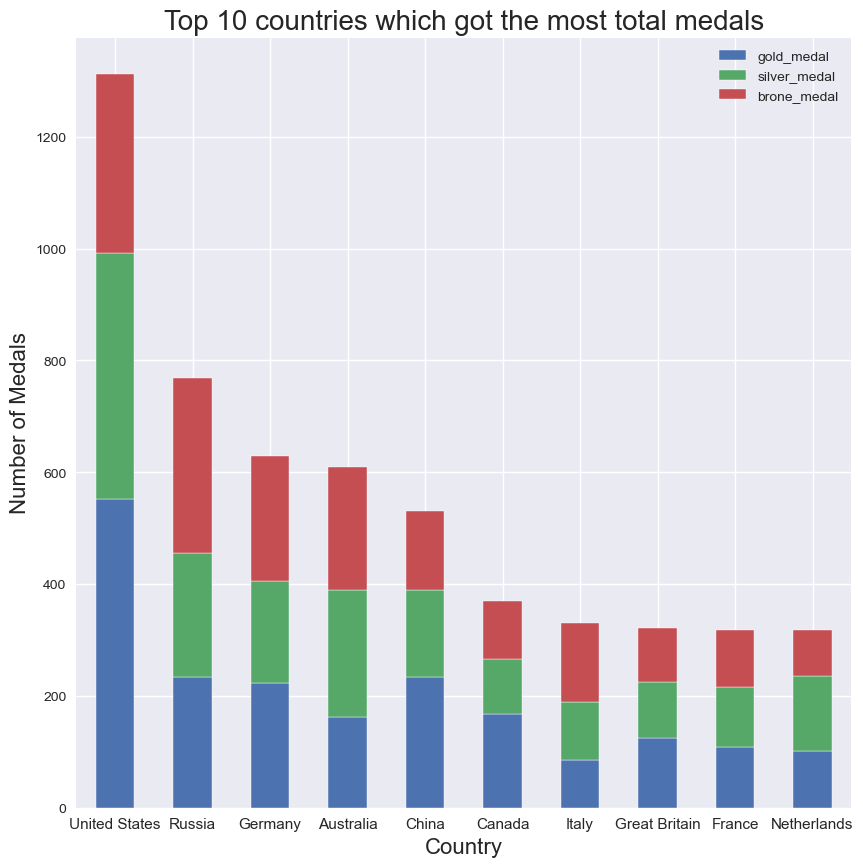

In [54]:
top_total_medals_countries[['gold_medal', 'silver_medal', 'brone_medal']].plot(kind='bar'
                                                                               ,stacked=True, 
                                                                              title='Top 10 countries got the most medals', xlabel='country')

plt.xticks(rotation=0,fontsize=11)
plt.xlabel('Country',fontsize=16)
plt.ylabel('Number of Medals',fontsize=16)
plt.title('Top 10 countries which got the most total medals',fontsize=20);

### Which countries WON the maximum Gold Medals in Olympic competitions held in 2012

In [55]:
# Filtering dataframe for year 2012
max_year = df.year.max()
df_2012 = df[(df.year == max_year)]

# Taking top 10 countries which got the most gold medals
df_2012 = df_2012.groupby('country')[['gold_medal']].sum().sort_values('gold_medal',ascending=False).head(10).reset_index()
df_2012

,country,gold_medal
0,United States,145
1,China,56
2,Russia,50
3,Great Britain,48
4,Germany,45
5,France,30
6,Netherlands,21
7,South Korea,18
8,Australia,18
9,Mexico,16


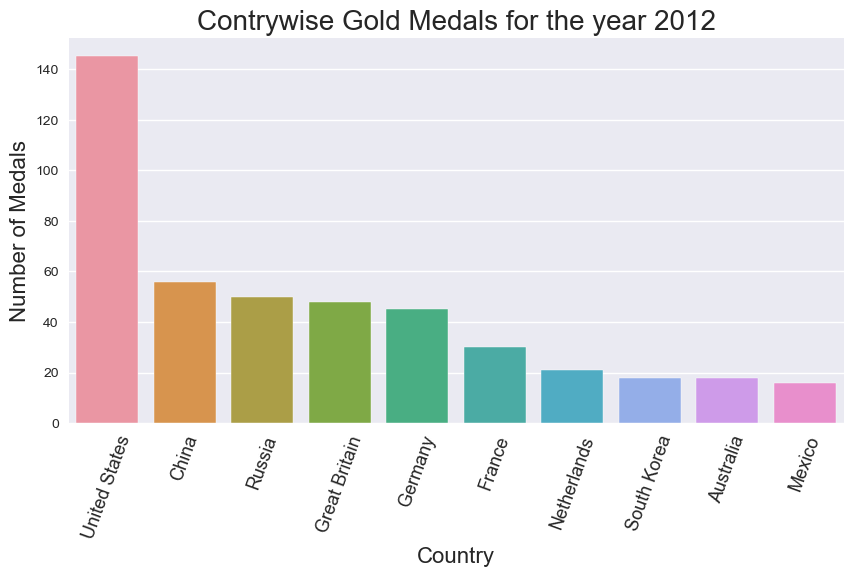

In [56]:
# Creating bar plot for top countries which got most number of gold medals in year 2012
plt.figure(figsize=(10,5))
sns.barplot(x=df_2012['country'],y=df_2012['gold_medal'])

plt.xticks(rotation=70,fontsize=13)
plt.xlabel('Country',fontsize=16)
plt.ylabel('Number of Medals',fontsize=16)
plt.title('Contrywise Gold Medals for the year 2012',fontsize=20);

- US seems to lead the Gold medal charts for the Olympics held in the year 2012. I am curious to know which sport fetch the most gold medals

### Let's see the top sports which won gold medals for United States in year 2012

In [57]:
# Filtering dataframe for year 2012 and country United States
US_Gold = df[(df.year == max_year) & (df.country == 'United States')]
# Taking sum of gold medals for each sports
US_Gold = US_Gold[['sports','gold_medal']].groupby('sports').sum()
US_Gold.reset_index(inplace=True)
Top_sports = US_Gold.sort_values('gold_medal', ascending=False)
Top_sports.head()

,sports,gold_medal
13,Swimming,41
2,Basketball,24
1,Athletics,19
8,Football,17
17,Waterpolo,12


- It seems like Swimming fetched the maximum Gold medals to US. Below is the visual representation of the same.

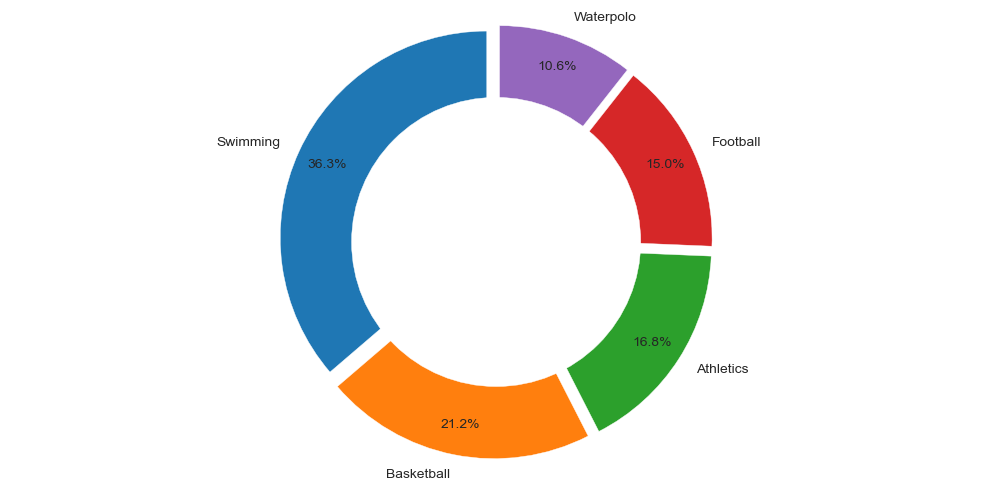

In [59]:
fig1, ax1 = plt.subplots()
matplotlib.rcParams['figure.figsize'] = (5,5)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#explsion
explode = (0.05,0.05,0.05,0.05,0.05)

ax1.pie(Top_sports.head()['gold_medal'], colors = colors, labels= Top_sports.head()['sports'], autopct='%1.1f%%', startangle=90
       , pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Medals won by India during these years

In [60]:
Indian_medal = df[df['country']=='India']
Indian_medal.groupby('country')[['gold_medal','silver_medal','brone_medal','total_medal']].sum()

,gold_medal,silver_medal,brone_medal,total_medal
country,,,,
India,1,3,7,11


- Total medals won by india during 2000 to 2012 are 11. 1 gold medal, 3 silver medals and 7 bronze medals

### Let's see who won this single Gold medal for India

In [61]:
Indian_medal[Indian_medal['gold_medal']==1]

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal,logarithm_age
2807,Abhinav Bindra,25.0,India,2008,8/24/2008,Shooting,1,0,0,1,3.258097


### Oh! Its legendary Abhinav Bindra who won Gold medal for India in 2008 for Shooting at age of 25 years

## Final Insights From the above Oylmpics Data Analysis :

- USA tops most of the medal tally either its gold, silver or bronze.
- We can also come to the conclusions that USA has most number of participants followed by Russia.
- Russia is the second most successful country after USA in the oylmpics games.
- Most of the participants have participated in the Athletics.
- India has got 1 gold medal i.e., in 2008 in shooting and that gold medal was won by Abhinav Bindra and India has a total medal tally of 11 in oylmpic games from the years 2000 to 2012.